<a href="https://colab.research.google.com/github/santoshdhalwalkar/tellco/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import drive from google
from google.colab import drive

In [2]:
# mount the drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
 #read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/cleanedtelecomunication_df.csv")
df.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,Total_Data.1,Total_DL.1,Total_UL.1
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,599743023.0,556406594.0,43336429.0
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,798245704.0,757526492.0,40719212.0
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,192095344.0,139043208.0,53052136.0
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,359872820.0,329159454.0,30713366.0
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,604428354.0,546747900.0,57680454.0


In [5]:
# Calculate Sessions Frequency by grouping by 'MSISDNNumber' and counting 'BearerId'
sessions_frequency = df.groupby('MSISDNNumber')['BearerId'].count().reset_index()

# Rename the column for clarity
sessions_frequency.columns = ['MSISDNNumber', 'session_frequency']

# Display the result
print(sessions_frequency)

       MSISDNNumber  session_frequency
0      3.360100e+10                  1
1      3.360100e+10                  1
2      3.360100e+10                  1
3      3.360101e+10                  1
4      3.360101e+10                  1
...             ...                ...
56662  3.378996e+10                  1
56663  3.378996e+10                  1
56664  3.378997e+10                  1
56665  3.378998e+10                  1
56666  3.379000e+10                  1

[56667 rows x 2 columns]


In [6]:
# Concatenate DataFrames
df = pd.concat([df, sessions_frequency],axis=1)

In [7]:
df

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,Total_Data.1,Total_DL.1,Total_UL.1,MSISDNNumber,session_frequency
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,599743023.0,556406594.0,43336429.0,3.360100e+10,1.0
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,798245704.0,757526492.0,40719212.0,3.360100e+10,1.0
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,192095344.0,139043208.0,53052136.0,3.360100e+10,1.0
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,359872820.0,329159454.0,30713366.0,3.360101e+10,1.0
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,604428354.0,546747900.0,57680454.0,3.360101e+10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.349880e+18,3.362150e+10,9.294000e+07,26.0,2.0,41.0,44.0,568730.0,20949.5,612360045.0,...,39581975.0,5803244.00,2.334997e+06,694590676.0,3.466574e+06,678154314.0,638572339.0,39581975.0,NaN,NaN
65567,7.349880e+18,3.362647e+10,8.874000e+07,29.0,2.0,47.0,47.0,568730.0,20949.5,163989531.0,...,24587307.0,17156072.00,4.918463e+06,821308206.0,4.992196e+06,222563460.0,197976153.0,24587307.0,NaN,NaN
65568,7.349880e+18,3.361957e+10,8.274000e+07,45.0,5.0,65.0,61.0,568730.0,20949.5,781632345.0,...,44038913.0,18752564.00,1.082820e+07,47444070.0,4.811422e+06,873872323.0,829833410.0,44038913.0,NaN,NaN
65569,1.311450e+19,3.361962e+10,9.792000e+07,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,401522016.0,371895920.0,29626096.0,NaN,NaN


In [8]:
df = df.T.drop_duplicates().T


In [9]:
# Drop the duplicate column
df = df.loc[:, ~df.columns.duplicated()]

# Drop rows where 'MSISDNNumber1' has NaN values
df = df.dropna(subset=['MSISDNNumber'])

# Display the cleaned DataFrame

In [10]:
# Calculate the median of the 'session_frequency' column
median_session_frequency = df['session_frequency'].median()

# Fill NaN values in the 'session_frequency' column with the median
df['session_frequency'].fillna(median_session_frequency, inplace=True)

# Display the DataFrame after filling NaN values
df

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,YoutubeDL_Bytes,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,17400892.0,20806551.00,599743023.0,556406594.0,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06,1.0
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,19431593.0,9907089.00,798245704.0,757526492.0,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07,1.0
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,7438887.0,9887128.00,192095344.0,139043208.0,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07,1.0
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,3334865.0,1530332.00,359872820.0,329159454.0,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06,1.0
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,23039020.0,13958301.00,604428354.0,546747900.0,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.349880e+18,3.362150e+10,9.294000e+07,26.0,2.0,41.0,44.0,568730.0,20949.5,612360045.0,...,6304791.0,20675907.00,678154314.0,638572339.0,39581975.0,5803244.00,2.334997e+06,694590676.0,3.466574e+06,1.0
65567,7.349880e+18,3.362647e+10,8.874000e+07,29.0,2.0,47.0,47.0,568730.0,20949.5,163989531.0,...,6400193.0,6819538.00,222563460.0,197976153.0,24587307.0,17156072.00,4.918463e+06,821308206.0,4.992196e+06,1.0
65568,7.349880e+18,3.361957e+10,8.274000e+07,45.0,5.0,65.0,61.0,568730.0,20949.5,781632345.0,...,22613630.0,15464894.00,873872323.0,829833410.0,44038913.0,18752564.00,1.082820e+07,47444070.0,4.811422e+06,1.0
65569,1.311450e+19,3.361962e+10,9.792000e+07,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,...,8817106.0,13172589.00,401522016.0,371895920.0,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06,1.0


##Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster

In [11]:
from scipy.spatial.distance import euclidean

# Select the relevant columns used in clustering
features = df[['session_frequency', 'Calculated_Duration_Seconds', 'Total_Data']]

# Check for NaNs or Infs and handle them (e.g., fill with 0 or drop)
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Alternatively, you can use features.dropna(inplace=True)

# Define the centroid of the less engaged cluster (cluster 1)
less_engaged_centroid = [0.002972, 0.093462, 0.068495]

# Calculate the Euclidean distance for each user from the less engaged cluster centroid
df['engagement_score'] = features.apply(lambda row: euclidean(row, less_engaged_centroid), axis=1)

# Save the result with engagement scores
output_file_path = '/content/drive/MyDrive/cengagement_scores_simple.csv'
df.to_csv(output_file_path, index=False)

# Output the file path
print("Engagement scores have been saved to:", output_file_path)

Engagement scores have been saved to: /content/drive/MyDrive/cengagement_scores_simple.csv


In [12]:
# Load the CSV file with engagement scores
engagement_scores = pd.read_csv('/content/drive/MyDrive/cengagement_scores_simple.csv')



In [13]:
engagement_scores.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,20806551.0,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,6.472822e+08
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,9907089.0,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,8.325661e+08
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,9887128.0,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,3.010359e+08
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,1530332.0,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,4.275352e+08
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,13958301.0,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.499357e+08


###  Create engagement_scores dataframe and save it in csv

In [14]:
# Select and display the relevant columns
df_engagement_scores = engagement_scores['engagement_score']



#dataframe to csv
df_engagement_scores.to_csv('/content/drive/MyDrive/engagement_scores.csv', index=False)

df_engagement_scores.head()

,engagement_score
0,6.472822e+08
1,8.325661e+08
2,3.010359e+08
3,4.275352e+08
4,6.499357e+08


In [15]:
df_engagement_scores.isnull().sum()


0

#Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster

In [16]:
# Calculate the centroid for the worst experience cluster (maximum values)
worst_experience_centroid = engagement_scores.max()

# Compute the Euclidean distance from each user to the worst experience cluster
experience_scores = np.linalg.norm(engagement_scores - worst_experience_centroid, axis=1)

# Add the experience scores to the DataFrame
engagement_scores['Experience_Score'] = experience_scores

In [17]:
engagement_scores.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score,Experience_Score
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,6.472822e+08,7.200000e+16
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,8.325661e+08,7.200000e+16
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,3.010359e+08,7.200000e+16
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,4.275352e+08,7.200000e+16
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.499357e+08,5.836620e+18


###  Create Experience_Score dataframe and save it in csv

In [18]:
# Select and display the relevant columns
df_experience_Score = engagement_scores['Experience_Score']



#dataframe to csv
df_experience_Score.to_csv('/content/drive/MyDrive/experience_Score.csv', index=False)



In [19]:
df_experience_Score.isnull().sum()

0

##  The satisfaction score & report the top 10 satisfied customer

In [20]:
# Calculate the Satisfaction Score as the average of engagement and experience scores
engagement_scores['Satisfaction_Score'] = engagement_scores[['engagement_score', 'Experience_Score']].mean(axis=1)

# Sort the DataFrame by Satisfaction Score in descending order to get the top 10 satisfied customers
top_10_satisfied_customers = engagement_scores.nlargest(10, 'Satisfaction_Score')



In [21]:
# Select and display the relevant columns
df_top_10_satisfied_customers = top_10_satisfied_customers[ 'Satisfaction_Score']
df_top_10_satisfied_customers

,Satisfaction_Score
59369,3.134480e+18
11694,3.134480e+18
4755,3.134480e+18
10436,3.134480e+18
44635,3.134480e+18
5171,3.134480e+18
2867,3.134480e+18
7000,3.134480e+18
11329,3.134480e+18
7171,3.134480e+18


###  Create Satisfaction_Score dataframe and save it in csv

In [22]:
# Select and display the relevant columns
df_Satisfaction_Score = engagement_scores['Satisfaction_Score']



#dataframe to csv
df_Satisfaction_Score.to_csv('/content/drive/MyDrive/Satisfaction_Score.csv', index=False)

df_Satisfaction_Score.head()

,Satisfaction_Score
0,3.600000e+16
1,3.600000e+16
2,3.600000e+16
3,3.600000e+16
4,2.918310e+18


In [23]:
df_Satisfaction_Score.isnull().sum()

0

In [24]:
 #read the data from google drive
ss =pd.read_csv("/content/drive/MyDrive/Satisfaction_Score.csv")
ss.head()

,Satisfaction_Score
0,3.600000e+16
1,3.600000e+16
2,3.600000e+16
3,3.600000e+16
4,2.918310e+18


In [25]:
 #read the data from google drive
exp =pd.read_csv("/content/drive/MyDrive/experience_Score.csv")
exp.head()

,Experience_Score
0,7.200000e+16
1,7.200000e+16
2,7.200000e+16
3,7.200000e+16
4,5.836620e+18


In [26]:
#maindata dataframe to csv
engagement_scores.to_csv('/content/drive/MyDrive/telecomdata.csv', index=False)
engagement_scores.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score,Experience_Score,Satisfaction_Score
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,6.472822e+08,7.200000e+16,3.600000e+16
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,8.325661e+08,7.200000e+16,3.600000e+16
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,3.010359e+08,7.200000e+16,3.600000e+16
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,4.275352e+08,7.200000e+16,3.600000e+16
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.499357e+08,5.836620e+18,2.918310e+18


In [27]:
 #read the data from google drive
tele =pd.read_csv("/content/drive/MyDrive/telecomdata.csv")
tele.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,session_frequency,engagement_score,Experience_Score,Satisfaction_Score
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,1.0,6.472822e+08,7.200000e+16,3.600000e+16
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,1.0,8.325661e+08,7.200000e+16,3.600000e+16
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,1.0,3.010359e+08,7.200000e+16,3.600000e+16
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,1.0,4.275352e+08,7.200000e+16,3.600000e+16
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,1.0,6.499357e+08,5.836620e+18,2.918310e+18


##Build a regression model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

#### Define features (X) and target (y)

In [29]:
X = engagement_scores.drop(["Satisfaction_Score"], axis =1 )
y = engagement_scores["Satisfaction_Score"]

#### Split the data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.model_selection import cross_val_score
models = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'RMSE (Cross-Validation) '])

In [34]:

# Function to calculate RMSE using cross-validation
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)).mean()
    return rmse

# Function to evaluate the model
def evaluation(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2_square = r2_score(y, y_pred)
    return mae, mse, rmse, r2_square

In [35]:
# Define the regressors
Regressors = [
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

In [36]:

# DataFrame to store all results
all_results = pd.DataFrame({"Actual": y_test})

# DataFrame to store evaluation metrics
metrics_results = []

# Dictionary to store RMSE (CV) results
rmse_cv_results = {}

# Iterate through each regressor, fit the model, make predictions, and evaluate
for name, model in Regressors:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Add predictions to the DataFrame
    all_results[name + ' Predictions'] = y_pred


        # Evaluate the model
    # Evaluate the model
    mae, mse, rmse, r2_square = evaluation(y_test, y_pred)
    rmse_cv_val = rmse_cv(model)
    rmse_cv_results[name] = rmse_cv_val

    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2_square:.2f}")
    print(f"RMSE (CV): {rmse_cv_val:.2f}")
    print("\n")

print("Combined Results:")
print(all_results)

Ridge Results:
MAE: 14081551180135.89
MSE: 257418761513254189380141056.00
RMSE: 16044275038569.18
R² Score: 1.00
RMSE (CV): 20064572155503.09


Decision Tree Results:
MAE: 5494573394996.67
MSE: 395931652760401282752623673344.00
RMSE: 629231001111993.25
R² Score: 1.00
RMSE (CV): 116626729.58


Random Forest Results:
MAE: 5494572689618.60
MSE: 395931652513275401137410801664.00
RMSE: 629231000915621.88
R² Score: 1.00
RMSE (CV): 114999149.60


Gradient Boosting Results:
MAE: 43708699888381.30
MSE: 397103578214382202344464973824.00
RMSE: 630161549298576.50
R² Score: 1.00
RMSE (CV): 38250582978670.33


Combined Results:
             Actual  Ridge Predictions  Decision Tree Predictions  \
43991  2.918310e+18       2.918302e+18               2.918310e+18   
64302  2.954335e+18       2.954326e+18               2.954335e+18   
17298  3.600000e+16       3.602185e+16               3.600000e+16   
47875  2.918310e+18       2.918307e+18               2.918310e+18   
51077  2.918310e+18       2.91830

Text(0.5, 1.0, 'RMSE of Models using Cross-Validation')

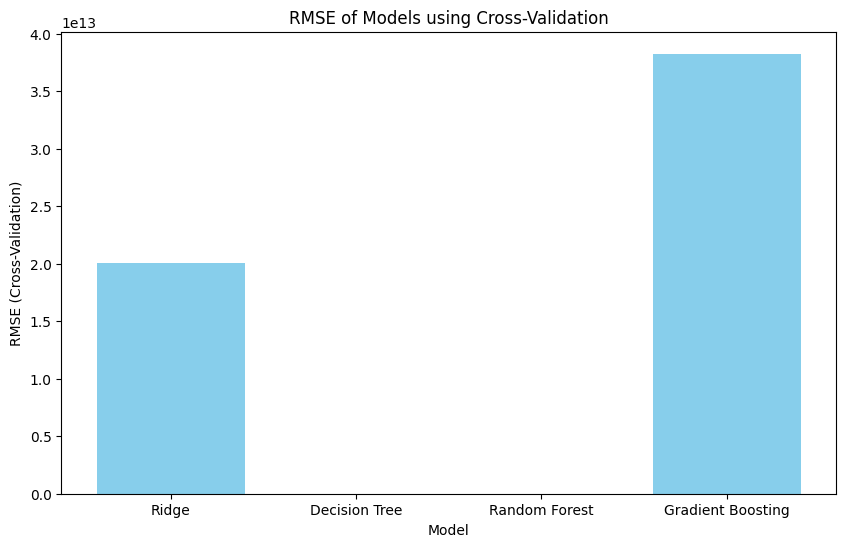

In [37]:
# Plot RMSE (CV) results
models = list(rmse_cv_results.keys())
rmse_values = list(rmse_cv_results.values())

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('RMSE of Models using Cross-Validation')

###Given the results, Random Forest seems to be the best model among the four options. Although all models show signs of overfitting with perfect R² scores and high error metrics, Random Forest has the lowest RMSE (CV), suggesting it generalizes slightly better on unseen data compared to the other models.

##Run a k-means (k=2) on the engagement & the experience score.

---



In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

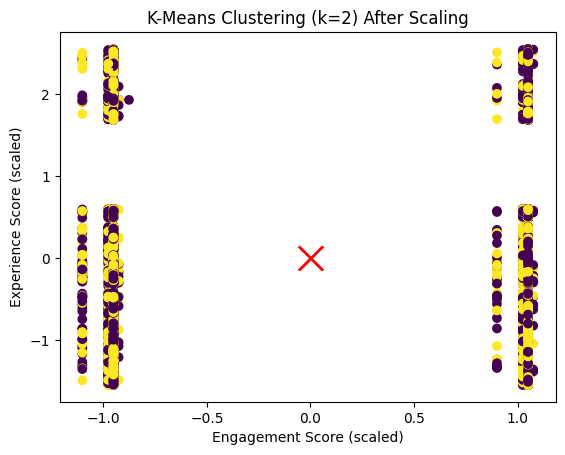

In [39]:
# Selecting the relevant columns
scluster = engagement_scores[['engagement_score', 'Experience_Score']]

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Run k-means with k=2 on the scaled data
kmeans = KMeans(n_clusters=2, random_state=0)
engagement_scores['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=engagement_scores['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # cluster centers
plt.xlabel('Engagement Score (scaled)')
plt.ylabel('Experience Score (scaled)')
plt.title('K-Means Clustering (k=2) After Scaling')
plt.show()

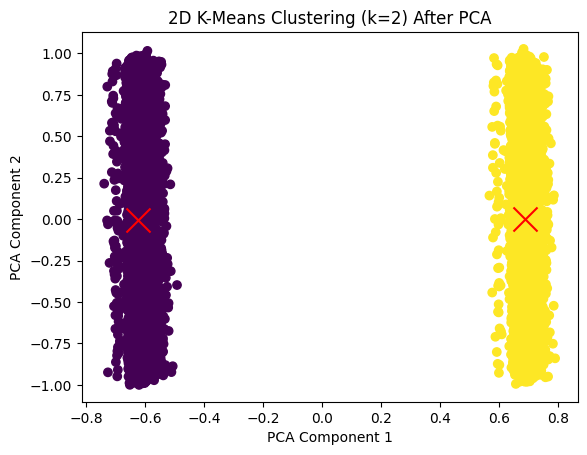

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the relevant columns
scluster = engagement_scores[['engagement_score', 'Experience_Score']]

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA (optional)
pca = PCA(n_components=2)  # Since we have only two features, n_components=2
X_pca = pca.fit_transform(X_scaled)

# Step 3: Run k-means with k=2 on the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=0)
engagement_scores['Cluster'] = kmeans.fit_predict(X_pca)


# Step 4: Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=engagement_scores['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')  # cluster centers
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D K-Means Clustering (k=2) After PCA')
plt.show()



1.   Cluster 1 (Purple): If these users have lower engagement and experience scores, they might be at risk of churn or may require targeted interventions to improve their experience and increase their engagement.

2.   Cluster 2 (Yellow): These users are likely satisfied and engaged, representing a more loyal user base. Efforts to maintain or further enhance their experience could help retain this segment.


In [41]:
# Aggregating the average satisfaction & experience score per cluster
average_scores = engagement_scores.groupby('Cluster')[['Satisfaction_Score', 'Experience_Score']].mean()

average_scores

,Satisfaction_Score,Experience_Score
Cluster,,
0,2.921645e+18,5.843291e+18
1,3.816195e+16,7.632390e+16




1.   Cluster 0 appears to be associated with users who are both highly satisfied and have a high experience score.

2.  Cluster 1 might represent users who are relatively satisfied but have a much lower experience score.



In [42]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

# Load the pickled model
model_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
model_from_pickle.predict(X_test)

array([2.91827368e+18, 2.95429751e+18, 3.60402330e+16, ...,
       3.60402330e+16, 3.60402330e+16, 2.91827368e+18])

In [43]:
from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

# Load the model from the file
model_from_joblib = joblib.load('model.pkl')

# Use the loaded model to make predictions
model_from_joblib.predict(X_test)

array([2.91827368e+18, 2.95429751e+18, 3.60402330e+16, ...,
       3.60402330e+16, 3.60402330e+16, 2.91827368e+18])